In [1]:
import sys
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import plotly.express as px
from scipy.fft import fft
import klib
%matplotlib inline

In [2]:
parent_dir = os.path.abspath(r'D:')
concatenated_yaws_dir = os.path.join(parent_dir, 'processed_data', 'Concatenated_Yaws')
#inputoutput_dir = os.path.join(parent_dir, 'processed_data', 'InputOutput')
output_dir = os.path.join(parent_dir, 'processed_data', 'ModelingData')


In [3]:
import os
import pandas as pd

output_dir = os.path.join(parent_dir, 'processed_data', 'ModelingData')

file_list = os.listdir(output_dir)

for file_name in file_list:
    file_path = os.path.join(output_dir, file_name)
    if os.path.isfile(file_path):
        big_train_df = pd.read_parquet(file_path)
        big_test_df=  pd.read_parquet(file_path)
        print(f"File: {file_name} | Shape: {big_train_df.shape}")


File: big_train.parquet | Shape: (62074, 141)
File: big_test.parquet | Shape: (15498, 141)


In [4]:
big_train_df.head()

,acceleration_CROSS_max,acceleration_CROSS_mean,acceleration_CROSS_median,acceleration_CROSS_min,acceleration_CROSS_q1,acceleration_CROSS_q3,acceleration_CROSS_std,acceleration_THRUST_max,acceleration_THRUST_mean,acceleration_THRUST_median,...,wind_speed_q3,wind_speed_std,yaw_error_max,yaw_error_mean,yaw_error_median,yaw_error_min,yaw_error_q1,yaw_error_q3,yaw_error_std,Turbulence
1,0.079123,-0.000025,0.000207,-0.081799,-0.006320,0.006222,0.016439,0.098308,0.000017,-0.000257,...,4.210862,0.303820,6.776547,-1.220241,-1.466198,-8.761596,-2.809187,0.123484,2.272140,0.075750
8,0.080641,0.000008,0.000514,-0.079200,-0.010629,0.010517,0.017438,0.162419,0.000027,-0.000233,...,6.332546,0.426658,7.401423,-1.081554,-1.077921,-9.072455,-2.637816,0.420735,2.345756,0.070558
13,0.114809,-0.000008,-0.000328,-0.132331,-0.018883,0.018894,0.028989,0.204867,0.000042,0.000039,...,7.869155,0.510174,8.113455,-0.955399,-0.957302,-9.328156,-2.590312,0.649764,2.346650,0.067808
14,0.143640,0.000045,0.000258,-0.130101,-0.022333,0.022096,0.033276,0.293878,-0.000093,-0.000285,...,8.373882,0.560048,6.560745,-0.905213,-0.889969,-8.273975,-2.405917,0.602190,2.201915,0.069973
20,0.170798,0.000066,-0.000534,-0.176361,-0.027387,0.027084,0.043117,0.314227,-0.000052,-0.000444,...,10.503185,0.724701,8.928158,-1.059410,-1.026777,-9.543091,-2.527428,0.402301,2.170475,0.072405


array([[<AxesSubplot:title={'center':'acceleration_CROSS_max'}>,
        <AxesSubplot:title={'center':'acceleration_CROSS_mean'}>,
        <AxesSubplot:title={'center':'acceleration_CROSS_median'}>,
        <AxesSubplot:title={'center':'acceleration_CROSS_min'}>,
        <AxesSubplot:title={'center':'acceleration_CROSS_q1'}>,
        <AxesSubplot:title={'center':'acceleration_CROSS_q3'}>,
        <AxesSubplot:title={'center':'acceleration_CROSS_std'}>,
        <AxesSubplot:title={'center':'acceleration_THRUST_max'}>,
        <AxesSubplot:title={'center':'acceleration_THRUST_mean'}>,
        <AxesSubplot:title={'center':'acceleration_THRUST_median'}>,
        <AxesSubplot:title={'center':'acceleration_THRUST_min'}>,
        <AxesSubplot:title={'center':'acceleration_THRUST_q1'}>],
       [<AxesSubplot:title={'center':'acceleration_THRUST_q3'}>,
        <AxesSubplot:title={'center':'acceleration_THRUST_std'}>,
        <AxesSubplot:title={'center':'generator_speed_max'}>,
        <AxesSub

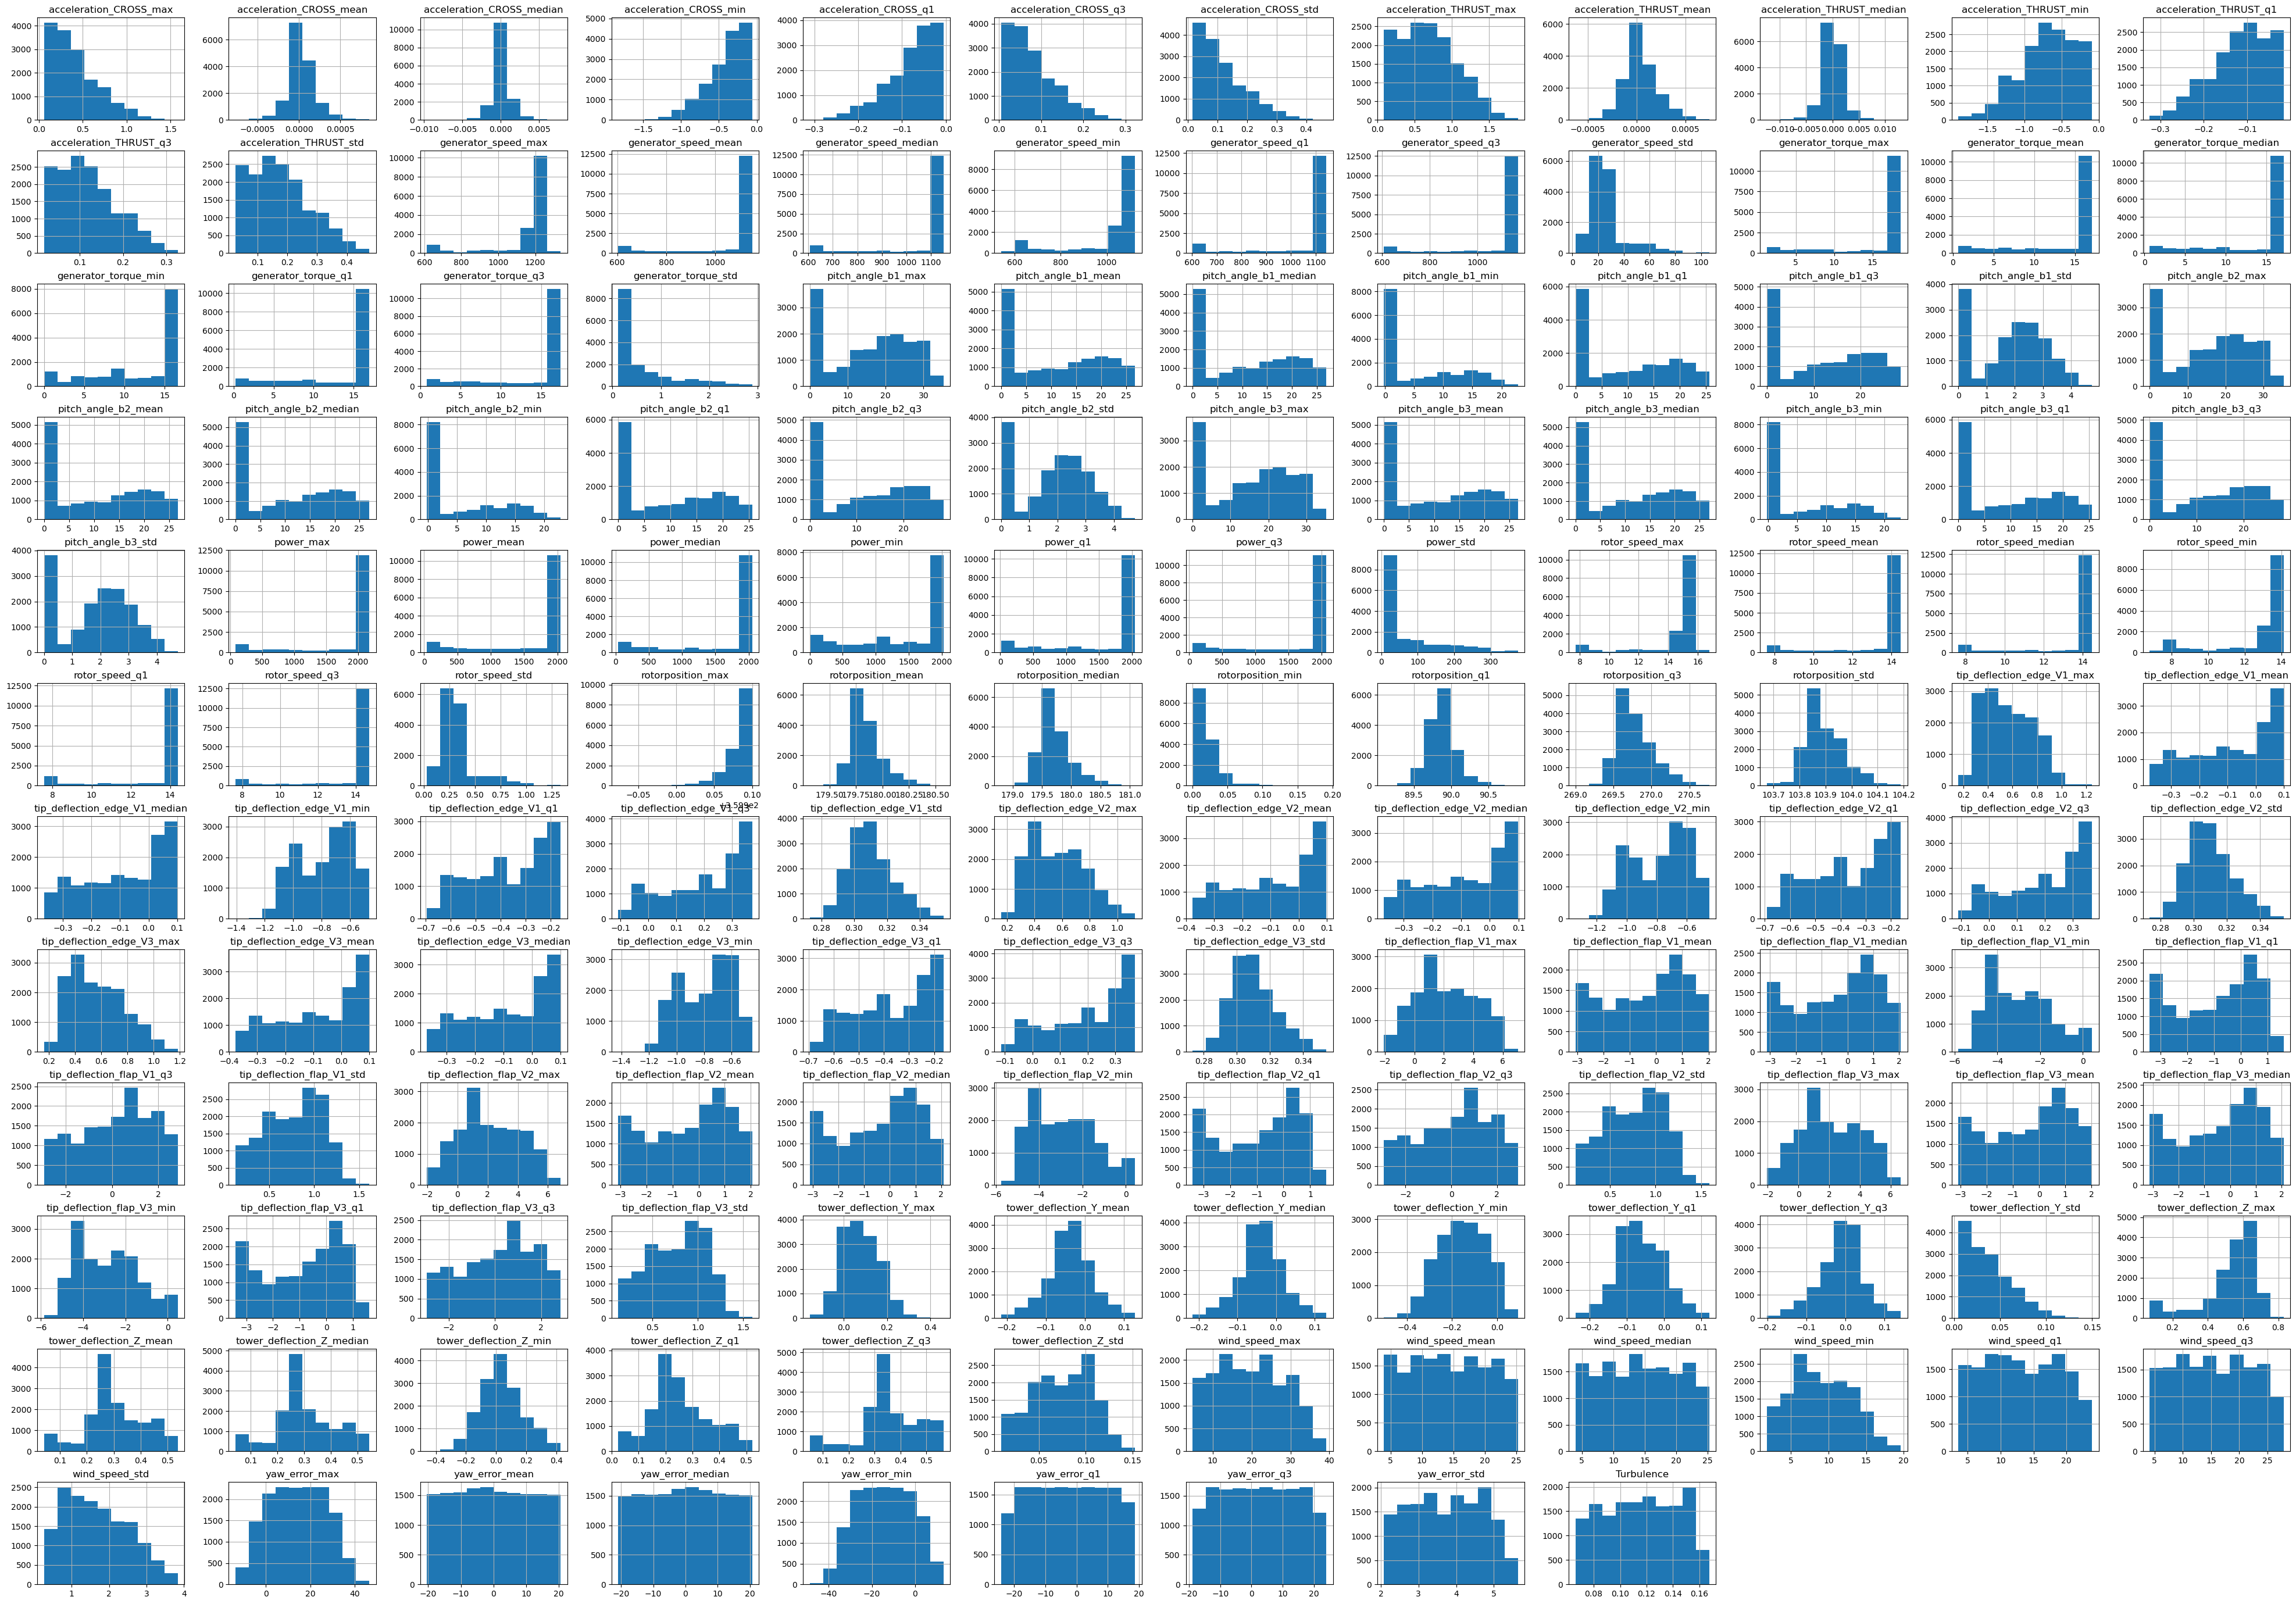

In [5]:
big_train_df.hist(figsize=(50,35))

C:\Users\musab\anaconda3\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


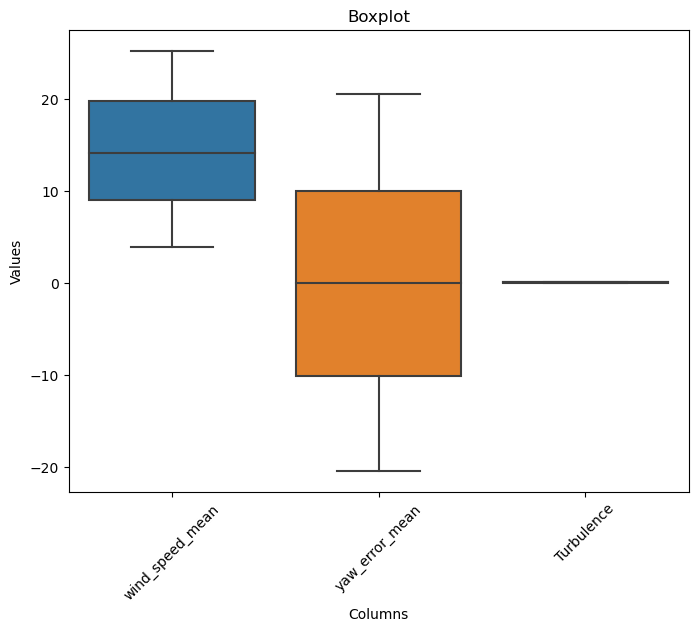

C:\Users\musab\anaconda3\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


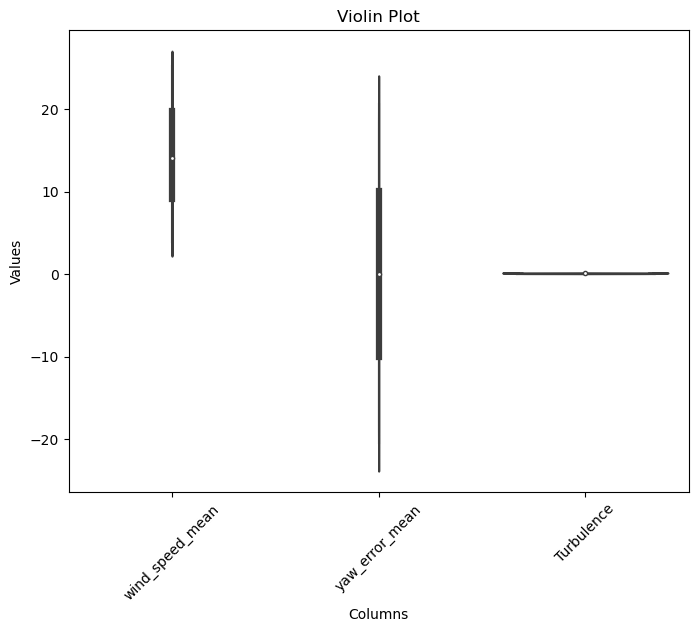

In [7]:

columns_of_interest = ['wind_speed_mean', 'yaw_error_mean', 'Turbulence']

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=big_train_df[columns_of_interest])
plt.title('Boxplot')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

# Violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(data=big_train_df[columns_of_interest])
plt.title('Violin Plot')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()


C:\Users\musab\anaconda3\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


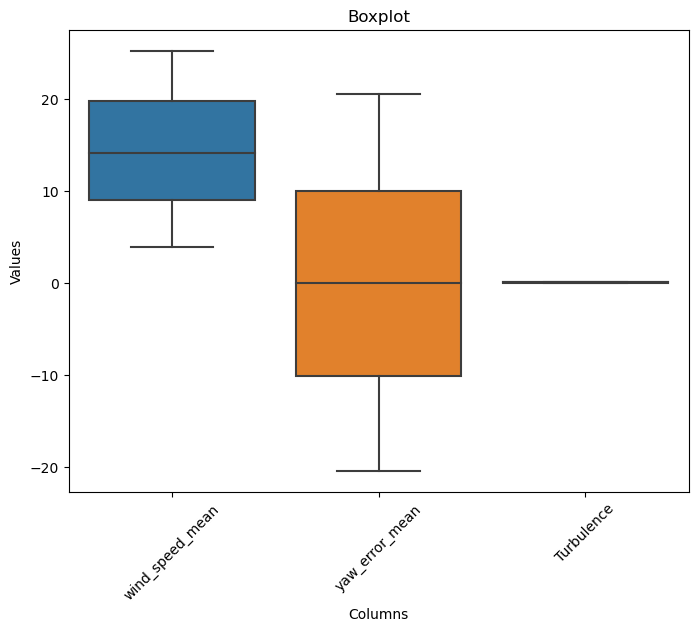

C:\Users\musab\anaconda3\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


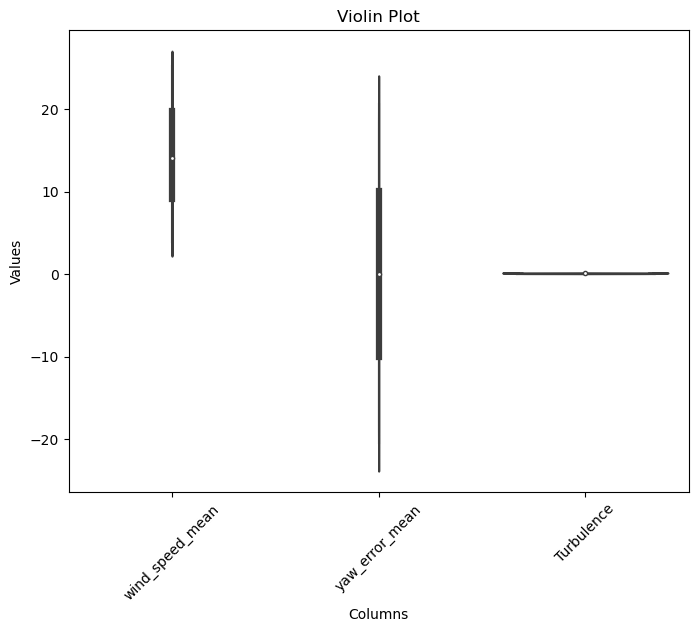

In [11]:

columns_of_interest = ['wind_speed_mean', 'yaw_error_mean', 'Turbulence']

plt.figure(figsize=(8, 6))
sns.boxplot(data=big_test_df[columns_of_interest])
plt.title('Boxplot')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 6))
sns.violinplot(data=big_test_df[columns_of_interest])
plt.title('Violin Plot')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()


C:\Users\musab\anaconda3\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


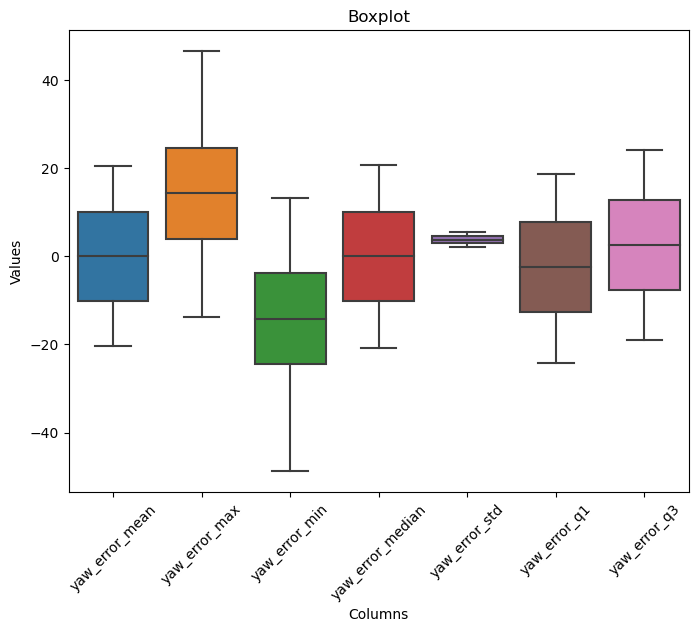

C:\Users\musab\anaconda3\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


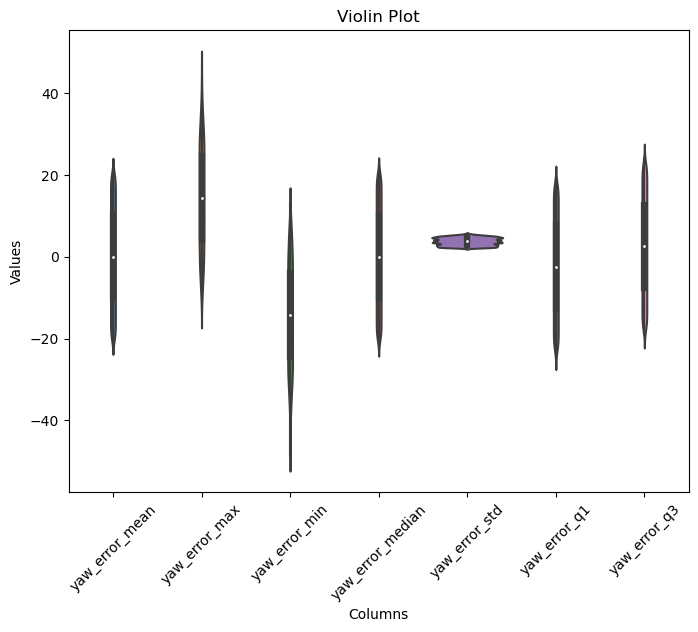

In [14]:

columns_of_interest =  ['yaw_error_mean', 'yaw_error_max', 'yaw_error_min','yaw_error_median','yaw_error_std','yaw_error_q1','yaw_error_q3']

plt.figure(figsize=(8, 6))
sns.boxplot(data=big_test_df[columns_of_interest])
plt.title('Boxplot')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 6))
sns.violinplot(data=big_test_df[columns_of_interest])
plt.title('Violin Plot')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()


In [13]:
import pandas as pd

def detect_outliers_iqr(df, columns, threshold=1.5):
    outliers = []
    for column in columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr
        column_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers.append(column_outliers)
    return pd.concat(outliers)

columns_to_detect_outliers = ['yaw_error_mean', 'yaw_error_max', 'yaw_error_min','yaw_error_median','yaw_error_std','yaw_error_q1','yaw_error_q3']

outliers = detect_outliers_iqr(big_train_df, columns_to_detect_outliers)

print(outliers)


Empty DataFrame
Columns: [acceleration_CROSS_max, acceleration_CROSS_mean, acceleration_CROSS_median, acceleration_CROSS_min, acceleration_CROSS_q1, acceleration_CROSS_q3, acceleration_CROSS_std, acceleration_THRUST_max, acceleration_THRUST_mean, acceleration_THRUST_median, acceleration_THRUST_min, acceleration_THRUST_q1, acceleration_THRUST_q3, acceleration_THRUST_std, generator_speed_max, generator_speed_mean, generator_speed_median, generator_speed_min, generator_speed_q1, generator_speed_q3, generator_speed_std, generator_torque_max, generator_torque_mean, generator_torque_median, generator_torque_min, generator_torque_q1, generator_torque_q3, generator_torque_std, pitch_angle_b1_max, pitch_angle_b1_mean, pitch_angle_b1_median, pitch_angle_b1_min, pitch_angle_b1_q1, pitch_angle_b1_q3, pitch_angle_b1_std, pitch_angle_b2_max, pitch_angle_b2_mean, pitch_angle_b2_median, pitch_angle_b2_min, pitch_angle_b2_q1, pitch_angle_b2_q3, pitch_angle_b2_std, pitch_angle_b3_max, pitch_angle_b3_mea

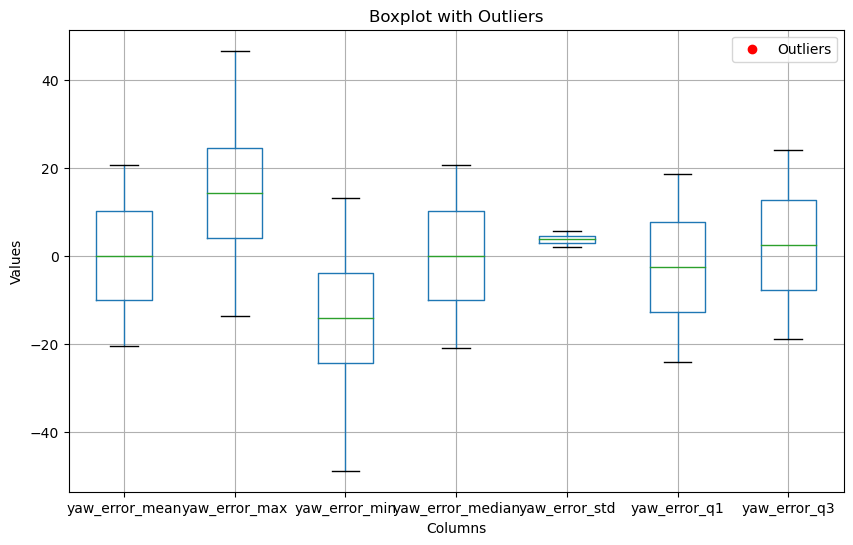

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

def detect_outliers_zscore(df, columns, threshold=3):
    outliers = []
    for column in columns:
        z_scores = (df[column] - df[column].mean()) / df[column].std()
        column_outliers = df[abs(z_scores) > threshold]
        outliers.append(column_outliers)
    return pd.concat(outliers)

columns_to_detect_outliers = ['yaw_error_mean', 'yaw_error_max', 'yaw_error_min','yaw_error_median','yaw_error_std','yaw_error_q1','yaw_error_q3']

outliers = detect_outliers_zscore(big_train_df, columns_to_detect_outliers)

plt.figure(figsize=(10, 6))
big_train_df[columns_to_detect_outliers].boxplot()
plt.scatter(outliers.index, outliers[columns_to_detect_outliers], color='red', label='Outliers')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Boxplot with Outliers')
plt.legend()
plt.show()


Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Note: The number of non binary numerical features is very large (141), please consider splitting the data. Showing plots for the first 20 numerical features. Override this by setting showall=True.


<AxesSubplot:xlabel='generator_speed_q3', ylabel='Density'>

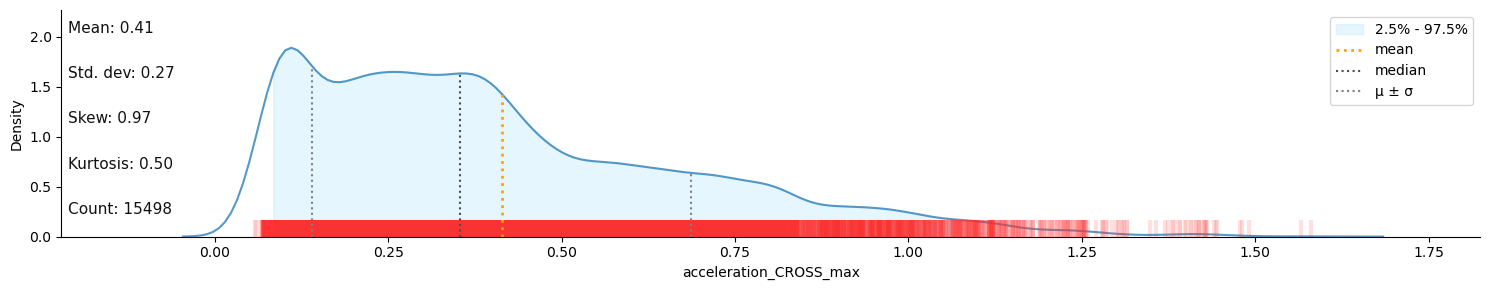

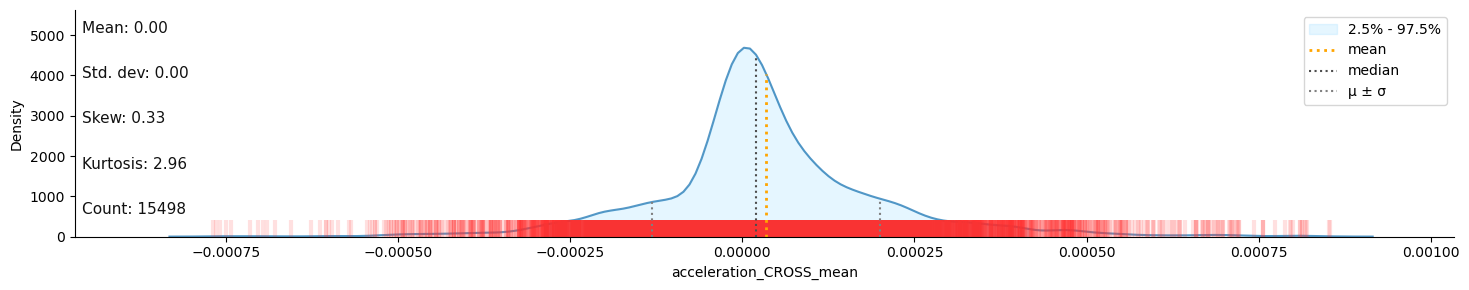

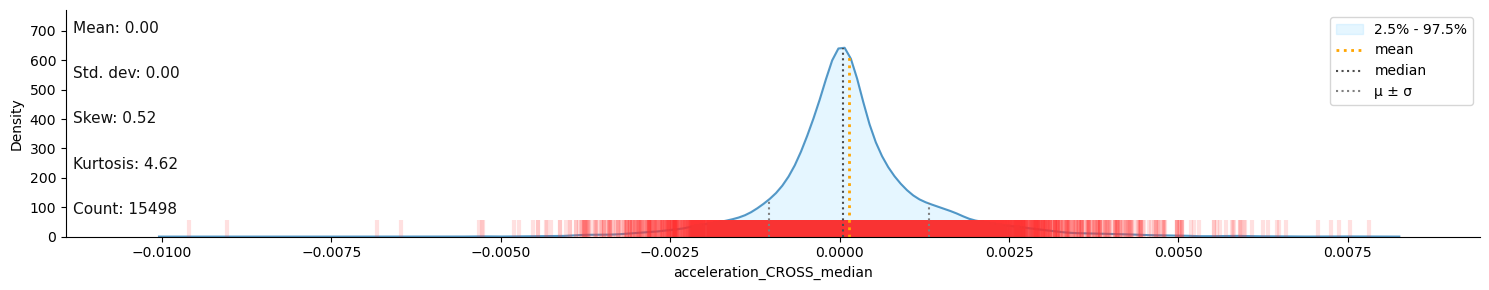

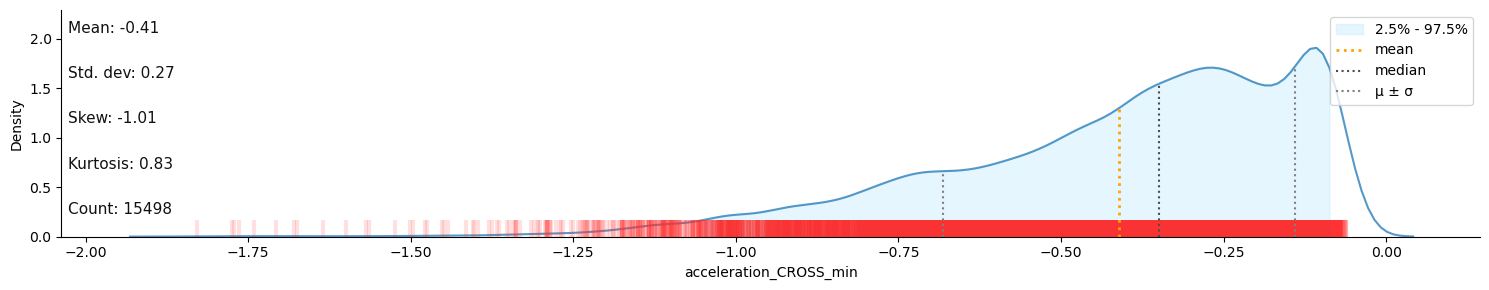

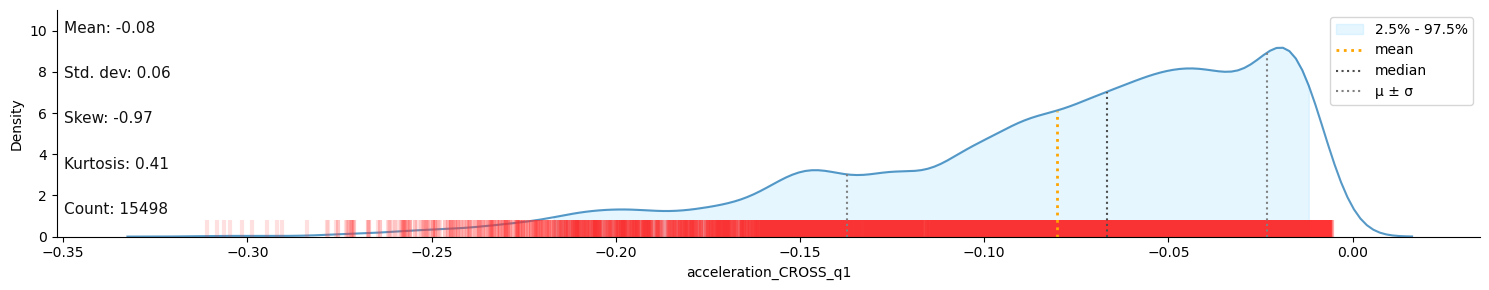

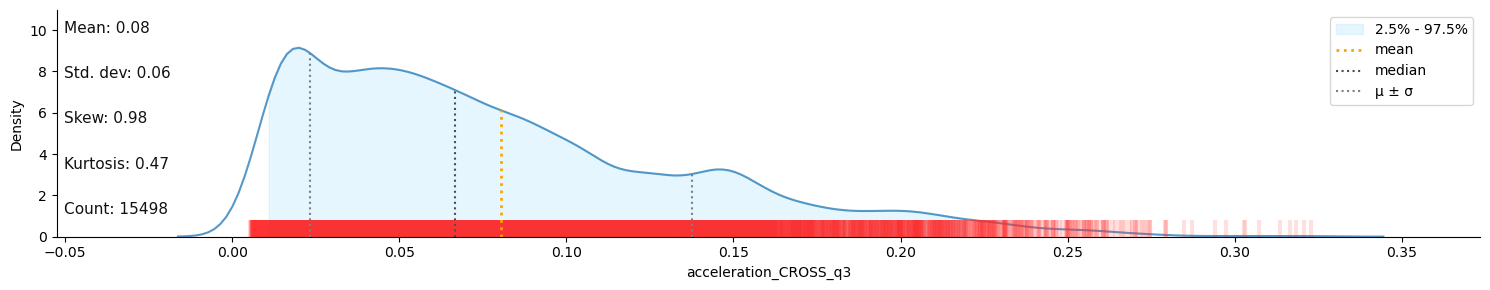

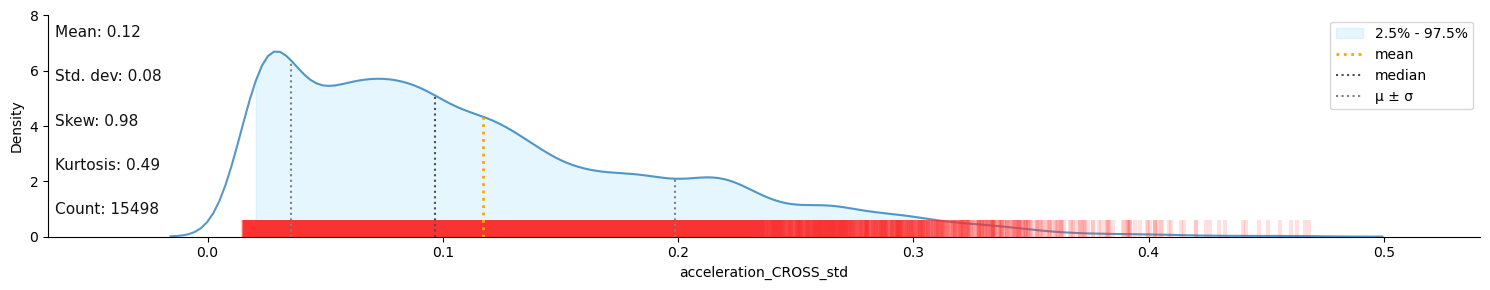

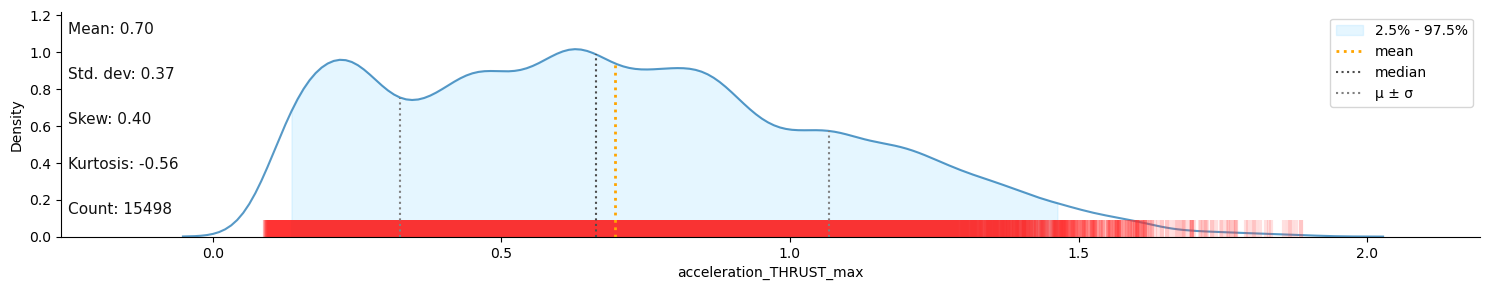

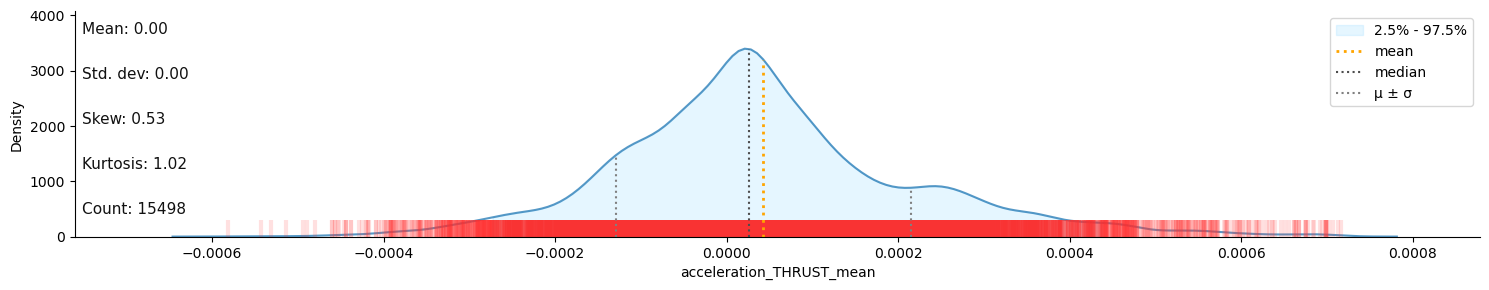

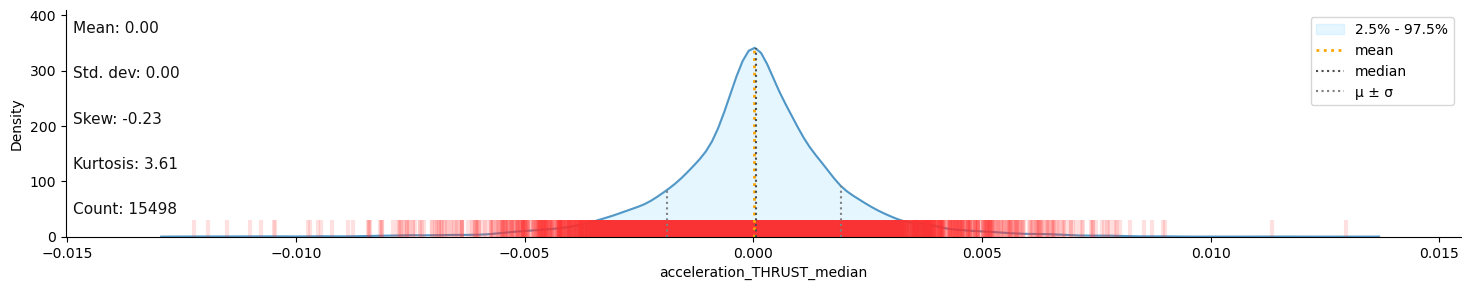

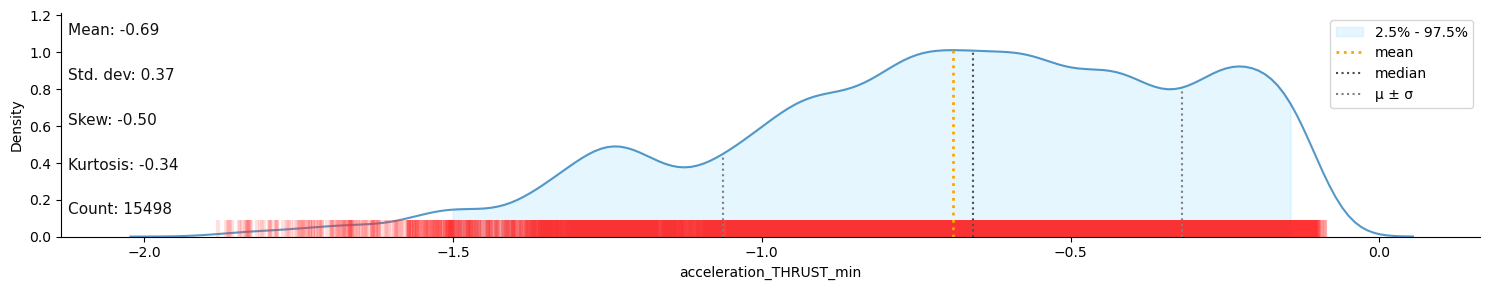

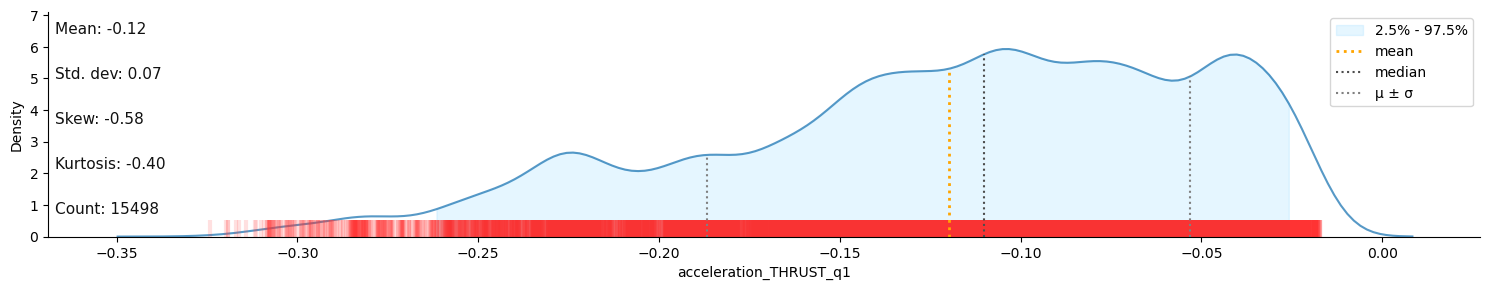

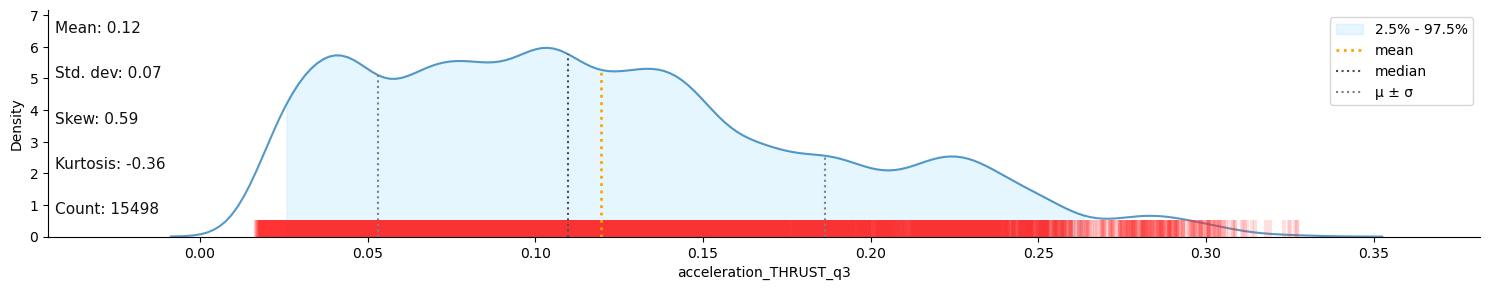

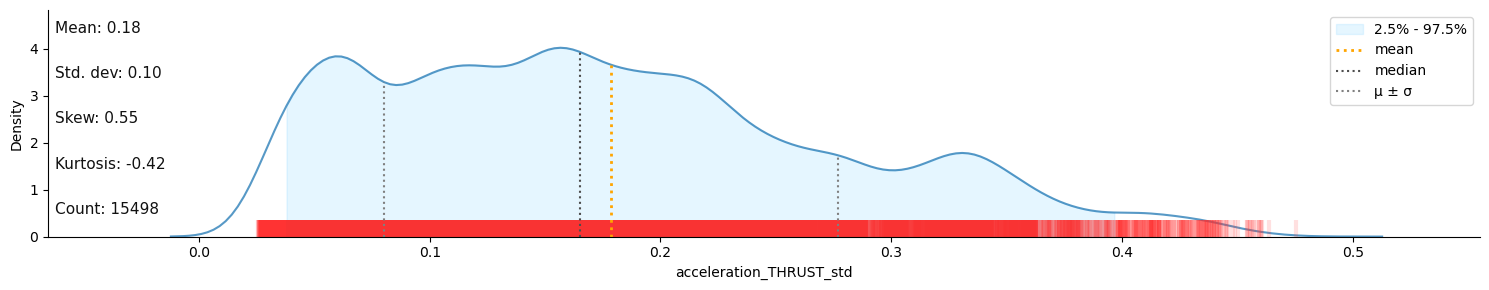

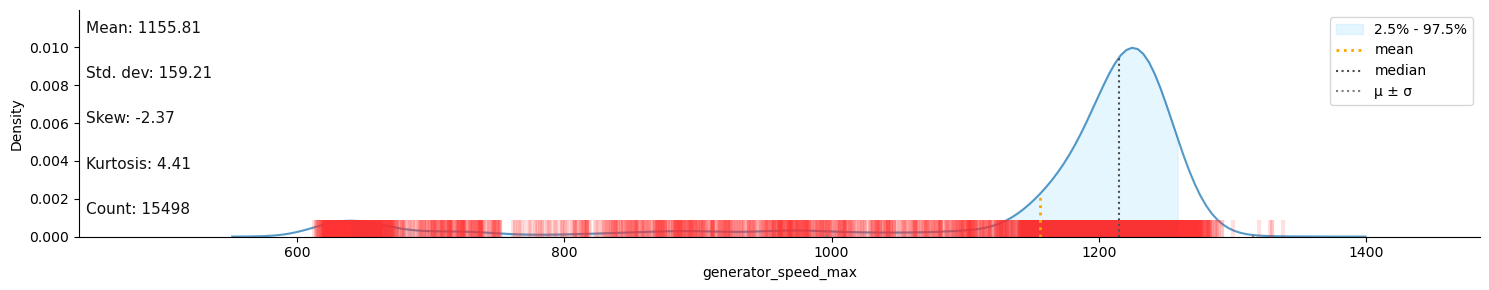

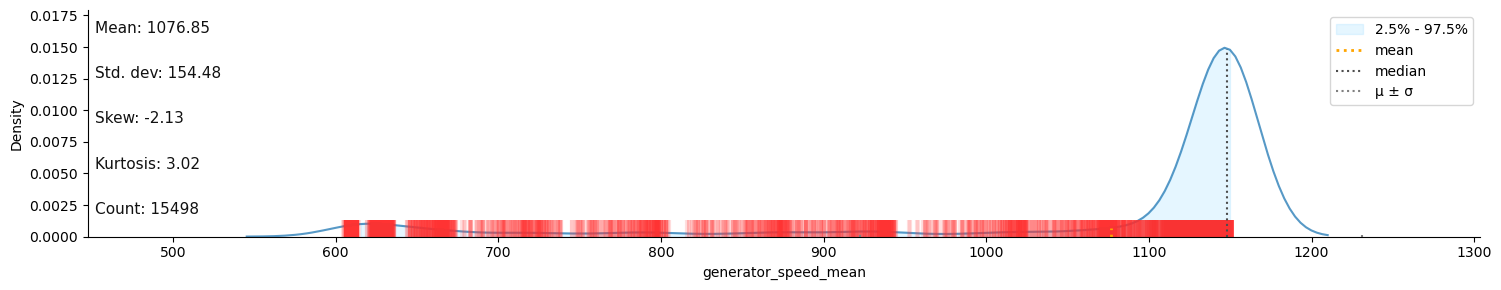

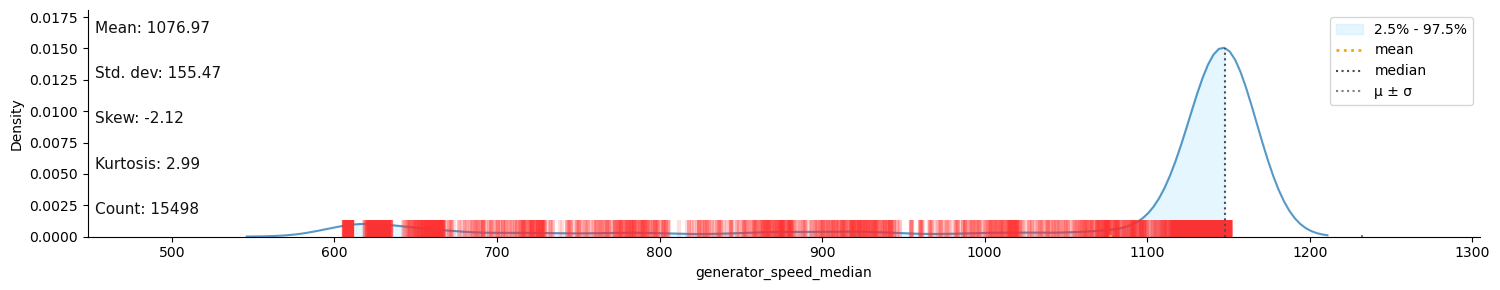

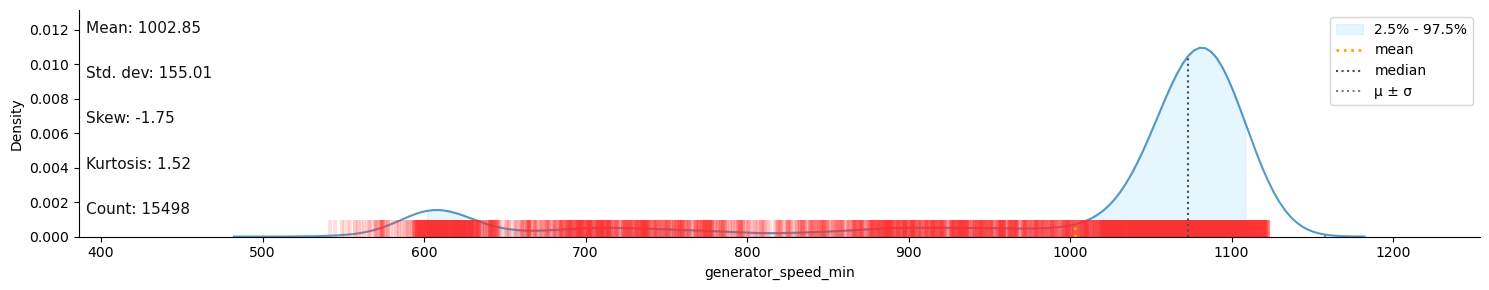

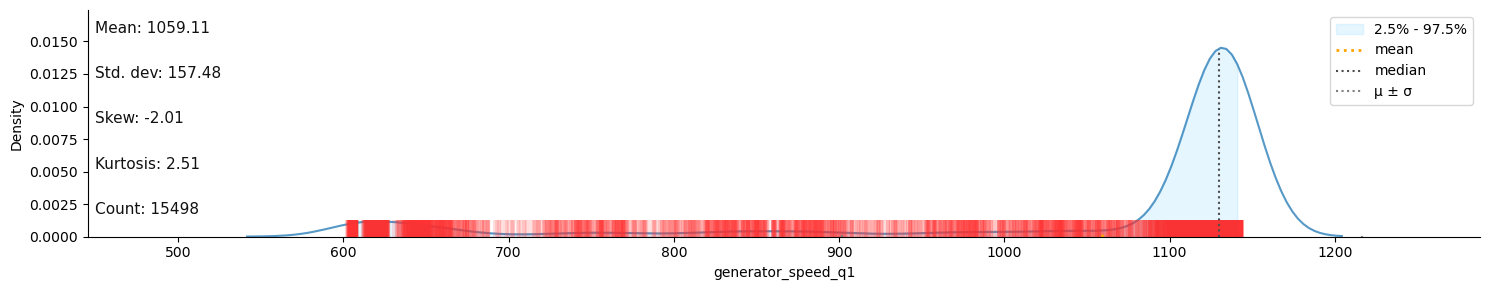

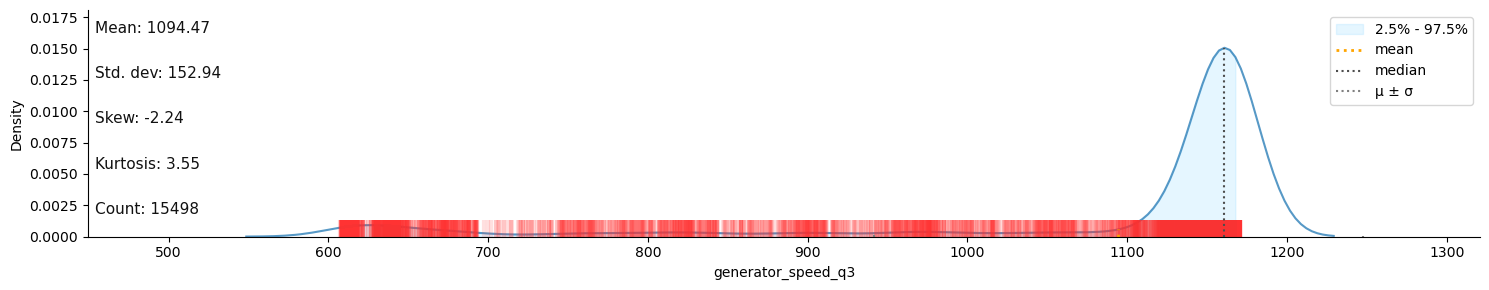

In [6]:
klib.dist_plot(big_train_df) 